# Importing Data in Python (Part 2)

## Chapter 3 - Diving Deep into the Twitter API


### Lecture - The Twitter API and Authentication

Unlike the OMDB and Wikipedia, the Twitter API does not allow anonymous access and you must have a Twitter account to get Twitter data from their API. From the Twitter API web page, you create a new app and then retrieve your keys and access token account from the same named tab. You will need to copy 4 pieces of information:
API Key
API Secret
Access Token
Access Token Secret

These are your authentication credentials that allow you to access the Twitter data through their API.

#### Twitter API Options
##### REST API
REST is an acronym for Representational State Transfer and Twitter's REST API allows developers to read and write Twitter data. 
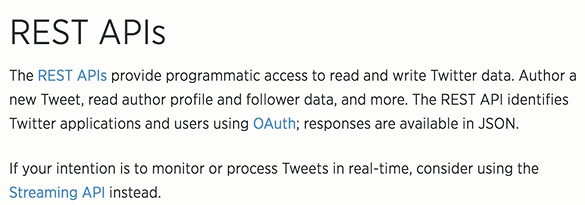

##### The Streaming API
In order to monitor or process tweets in real time, or in other words, to stream Twitter data, you to use Twitter's Streaming API, in particular the Public Stream API. The Public Stream API has a number of options.

##### GET statuses/sample API
For the purposes of these exercises, we want to read and process tweets and for that we can use the GET statuses/samples API. This API will return a small, random sample of all public streams. 

##### Firehose API
To access all public statuses, you would use the Firehose API provided by Twitter. This is not publicly available and requires a licensing fee.

Tweets are returned as JSONs and contain numerous possible fields. The Twitter Field Guide provides detailed information on what type of data and fields are available. 

#### Using Tweepy: Authentication Handler
For beginners accessing Twitter, the recommended package is Tweepy. The Tweepy package provides an oauth handler that takes care of passing all of the Twitter authentication tokens and keys and secrets. You give Tweepy the API key and secret to process with the .OAuthHandler() function and then pass the access credentials to the .set_access_token() method to take care of all of the Twitter authentication requirements. 

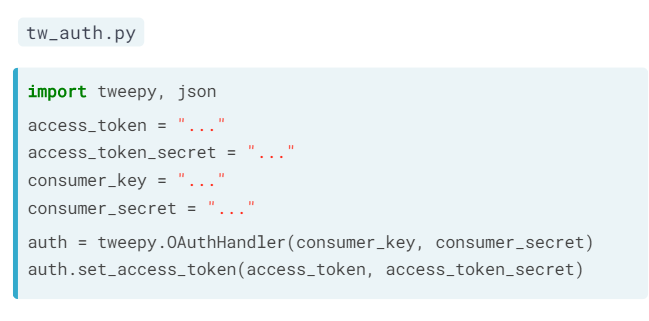

#### Tweepy: Define Listener Class

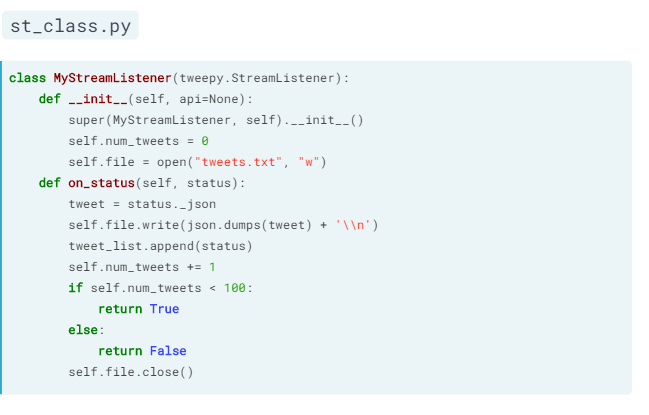

### Exercise 1

#### API Authentication
The package tweepy is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. In this interactive exercise, we have created some mock authentication credentials (if you wanted to replicate this at home, you would need to create a Twitter App as Hugo detailed in the video). Your task is to pass these credentials to tweepy's OAuth handler.

__Instructions:__
* Import the package tweepy.
* Pass the parameters consumer_key and consumer_secret to the function tweepy.OAuthHandler().
* Complete the passing of OAuth credentials to the OAuth handler auth by applying to it the method set_access_token(), along with arguments access_token and access_token_secret.

In [5]:
import os
os.chdir('c:\\datacamp\\data\\')
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables

access_token = "17566427-1uC96NMSOydFKOptexepsEOcohUyQHMfxaTsh9mCI"
access_token_secret = "HGYn1wkodypB1HU8KNOj2Uz1M32pGVllWMqGQgllHgojM"
api_key = "2DOR5VUqwf0SMENRBmYJ2VX3i"
api_secret = "60OKLQ5t71vxQkcYa4I44TgxhnsKQkL4olN0xhEAUuQaU0hNVL"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

#### Streaming tweets
Now that you have set up your authentication credentials, it is time to stream some tweets! We have already defined the tweet stream listener class, MyStreamListener, just as Hugo did in the introductory video. You can find the code for the tweet stream listener class here.

Your task is to create the Streamobject and to filter tweets according to particular keywords.

__Instructions:__
* Create your Stream object with authentication by passing tweepy.Stream() the authentication handler auth and the Stream listener l;
* To filter Twitter streams, pass to the track argument in stream.filter() a list containing the desired keywords 'clinton', 'trump', 'sanders', and 'cruz'.

In [6]:
import json
import tweepy

access_token = "17566427-1uC96NMSOydFKOptexepsEOcohUyQHMfxaTsh9mCI"
access_token_secret = "HGYn1wkodypB1HU8KNOj2Uz1M32pGVllWMqGQgllHgojM"
api_key = "2DOR5VUqwf0SMENRBmYJ2VX3i"
api_secret = "60OKLQ5t71vxQkcYa4I44TgxhnsKQkL4olN0xhEAUuQaU0hNVL"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

class MyStreamListener (tweepy.StreamListener):
    def __init__(self, api = None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file_name = "tweetss.txt"
        #self.file = open("tweetss.txt", "w")

    def on_status(self, status):
        tweet = status._json
        with open(self.file_name, 'a') as file:
            file.write(json.dumps(tweet) + '\n')
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False

    def on_error(self, status):
        print(status)
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)

tweets_listener = MyStreamListener(api)
stream = tweepy.Stream(api.auth, tweets_listener)    
stream.filter(track=['biden','trump','harris','pence'])

#### Load and explore your Twitter data
Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: tweets_data.

Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).

__Instructions:__
* Assign the filename 'tweets.txt' to the variable tweets_data_path.
* Initialize tweets_data as an empty list to store the tweets in.
* Within the for loop initiated by for line in tweets_file:, load each tweet into a variable, tweet, using json.loads(), then append tweet to tweets_data using the append() method.
* Hit submit and check out the keys of the first tweet dictionary printed to the shell.

In [7]:
import json

tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


#### Twitter data to DataFrame
Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text']; similarly, the language is stored in t1['lang']. Your task is to build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

__Instructions:__
* Use pd.DataFrame() to construct a DataFrame of tweet texts and languages; to do so, the first argument should be tweets_data, a list of dictionaries. The second argument to pd.DataFrame() is a list of the keys you wish to have as columns. Assign the result of the pd.DataFrame() call to df.
* Print the head of the DataFrame.

In [8]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


#### A little bit of Twitter text analysis
Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. In the pre-exercise code, we have defined the following function word_in_text(), which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

> import re<br>
<br>
>def word_in_text(word, text):<br>
>> word = word.lower()<br>
>> text = text.lower()<br>
>> match = re.search(word, text)<br>

>> if match:<br>
>>> return True<br>

>> return False<br>

You're going to iterate over the rows of the DataFrame and calculate how many tweets contain each of our keywords! The list of objects for each candidate has been initialized to 0.

__Instructions:__
* Within the for loop for index, row in df.iterrows():, the code currently increases the value of clinton by 1 each time a tweet (text row) mentioning 'Clinton' is encountered; complete the code so that the same happens for trump, sanders and cruz.

In [9]:
import re
import pandas as pd

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

#### Plotting your Twitter data
Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. You'll use the statistical data visualization library seaborn, which you may not have seen before, but we'll guide you through. You'll first import seaborn as sns. You'll then construct a barplot of the data using sns.barplot, passing it two arguments:

1. a list of labels and
2. a list containing the variables you wish to plot (clinton, trump and so on.)

Hopefully, you'll see that Trump was unreasonably represented! We have already run the previous exercise solutions in your environment.

__Instructions:__
* Import both matplotlib.pyplot and seaborn using the aliases plt and sns, respectively.
* Complete the arguments of sns.barplot:
* The first argument should be the list of labels to appear on the x-axis (created in the previous step).
* The second argument should be a list of the variables you wish to plot, as produced in the previous exercise (i.e. a list containing clinton, trump, etc).

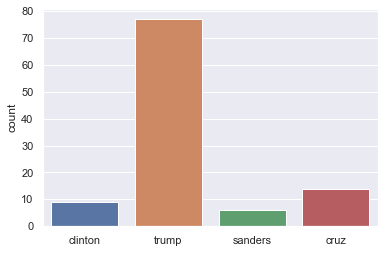

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

cd = ['clinton', 'trump', 'sanders', 'cruz']
ax = sns.barplot(cd, (clinton, trump, sanders, cruz))
ax.set(ylabel = "count")
plt.show()